In [1]:
import sys
print(sys.executable)

E:\anaconda3\envs\tensorflow21gpu\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
# import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능 여부: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train = pd.read_csv('prac1_train2.csv')

In [4]:
train_set = train[['usertagnum','jobtagnum','uniontagnum','companySize']]
predict_label = tf.cast(tf.one_hot(train['applied'],2), tf.int64)

In [5]:
train_set = (train_set - train_set.mean())/train_set.std()

In [6]:
seed = 7
np.random.seed(seed)

# Model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(10, input_dim=4))
model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(2, kernel_initializer='normal',activation=tf.nn.softmax))
model.add(tf.keras.layers.Dense(2))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_fit = model.fit(np.array(train_set), np.array(predict_label), epochs=11, batch_size=2, verbose=1,validation_split=0.1)

Train on 5400 samples, validate on 600 samples
Epoch 1/25
5400/5400 [==============================] - 7s 1ms/sample - loss: 0.8851 - accuracy: 0.6631 - val_loss: 0.7810 - val_accuracy: 0.7300
Epoch 2/25
5400/5400 [==============================] - 6s 1ms/sample - loss: 0.8482 - accuracy: 0.6544 - val_loss: 1.2642 - val_accuracy: 0.6250
Epoch 3/25
5400/5400 [==============================] - 6s 1ms/sample - loss: 0.8356 - accuracy: 0.5611 - val_loss: 0.6895 - val_accuracy: 0.5650
Epoch 4/25
5400/5400 [==============================] - 8s 2ms/sample - loss: 0.6140 - accuracy: 0.5474 - val_loss: 1.0886 - val_accuracy: 0.5517
Epoch 5/25
5400/5400 [==============================] - 8s 1ms/sample - loss: 0.8096 - accuracy: 0.5537 - val_loss: 0.8224 - val_accuracy: 0.5900
Epoch 6/25
5400/5400 [==============================] - 8s 1ms/sample - loss: 0.5827 - accuracy: 0.5978 - val_loss: 0.7497 - val_accuracy: 0.6083
Epoch 7/25
5400/5400 [==============================] - 8s 1ms/sample - loss:

In [7]:
model.evaluate(np.array(train_set), np.array(predict_label))

6000/6000 [==============================] - 0s 70us/sample - loss: 0.4012 - accuracy: 0.8572


[0.40120028249422707, 0.85716665]

In [8]:
test = pd.read_csv('prac1_test1.csv')

In [9]:
test_set = test[['usertagnum','jobtagnum','uniontagnum','companySize']].astype(int)

In [10]:
test_set = (test_set - train_set.mean())/train_set.std()

In [11]:
y_predict = model(np.array(test_set))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [12]:
print(y_predict)

tf.Tensor(
[[-27.332075    15.504329  ]
 [  0.14155912   6.2339287 ]
 [ -9.008583     8.8558235 ]
 ...
 [-39.602165    17.085415  ]
 [  1.7091527    4.476913  ]
 [-14.185438     7.9573226 ]], shape=(2435, 2), dtype=float32)


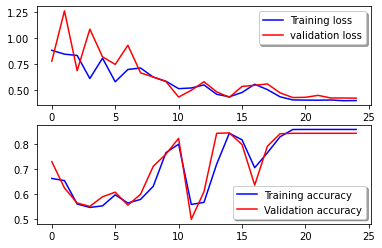

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_fit.history['loss'], color='b', label="Training loss")
ax[0].plot(history_fit.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_fit.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_fit.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
val_label_num = np.argmax(y_predict, axis=1).reshape(-1,1)

In [15]:
result = pd.DataFrame(val_label_num,columns=['applied'])

In [16]:
sys.argv[0]

'E:\\anaconda3\\envs\\tensorflow21gpu\\lib\\site-packages\\ipykernel_launcher.py'

In [17]:
import datetime
now = datetime.datetime.now()
result.to_csv('output_{}_prac1editlite1_11-2.csv'.format(now.strftime('%y_%m_%d_%H_%M_%S')), index=False)